# CMPU 4011 Machine Learning for Predictive Analytics
## ASSESSMENT 2 – BUILD A CLASSIFIER 
#1 Student Number: C15734155; Student Name: Pia Nila Flor Ofalsa
#2 Student Number: C15487922; Student Name: Jonathan Noble

### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn import preprocessing

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Analysis

### Importing and visualizing the data

In [3]:
featureNames = ["id","age","job","marital","education",
               "default","balance","housing",
               "loan","contact","day","month","duration","campaign",
               "pdays","previous","poutcome","y"]

In [4]:
df = pd.read_csv(r"data/trainingset.txt", header=None, names=featureNames)
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,TR1,44,JobCat9,single,secondary,no,29,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
1,TR2,31,JobCat4,married,secondary,no,2,yes,yes,unknown,5,may,0,1,-1,0,unknown,TypeA
2,TR3,42,JobCat4,divorced,tertiary,yes,2,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
3,TR4,58,JobCat2,married,primary,no,121,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
4,TR5,43,JobCat9,single,secondary,no,593,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
5,TR6,57,JobCat7,married,secondary,no,162,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
6,TR7,51,JobCat2,married,primary,no,229,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
7,TR8,45,JobCat11,single,unknown,no,13,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
8,TR9,31,JobCat7,married,secondary,no,0,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
9,TR10,40,JobCat2,married,primary,no,0,yes,yes,unknown,5,may,0,1,-1,0,unknown,TypeA


In [5]:
# DataFrame with the count of present values in each column:
present_data_counts = pd.DataFrame(df.count(), columns=['Present Values'])
present_data_counts

,Present Values
id,24318
age,24318
job,24318
marital,24318
education,24318
default,24318
balance,24318
housing,24318
loan,24318
contact,24318


In [6]:
#data frame with the count of missing values in each column
missing_data_counts = pd.DataFrame(df.isnull().sum(),columns=['Missing Values'])
missing_data_counts

,Missing Values
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [7]:
#dataframe of the data type of each column
data_types =pd.DataFrame(df.dtypes,columns=['Data Type'])
data_types

,Data Type
id,object
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object


In [8]:
#DataFrame with the count of unique values in each column:
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(df.columns.values):
    unique_value_counts.loc[v] = [df[v].nunique()]
unique_value_counts

,Unique Values
id,24318
age,75
job,12
marital,3
education,4
default,2
balance,5635
housing,2
loan,2
contact,3


In [9]:
#merge all data frame together by the index
#data not segregated
data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(unique_value_counts)
data_quality_report

,Data Type,Present Values,Missing Values,Unique Values
id,object,24318,0,24318
age,int64,24318,0,75
job,object,24318,0,12
marital,object,24318,0,3
education,object,24318,0,4
default,object,24318,0,2
balance,int64,24318,0,5635
housing,object,24318,0,2
loan,object,24318,0,2
contact,object,24318,0,3


### Data Statistics (Categorical)

In [10]:
#INITIALISING CATEGORICAL FEATURES
#select_dtypes function
#builds a new dataframe containing only the object columns.

cat_df = df.select_dtypes(include=['object']).copy()
cat_df = cat_df.drop(['id'], axis=1)
cat_df.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,24318,24318,24318,24318,24318,24318,24318,24318,24318,24318
unique,12,3,4,2,2,2,3,12,4,2
top,JobCat3,married,secondary,no,yes,no,cellular,may,unknown,TypeA
freq,5197,14639,12516,23871,13528,20350,15691,7448,19762,21495


### Data Statistics (Continuous)

In [11]:
#INITIALISING Continuous FEATURES
#select_dtypes function
#builds a new dataframe containing only the integer and float columns.

cont_df = df.select_dtypes(include=['int64','float64']).copy()
cont_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,24318.000000,24318.000000,24318.000000,24318.0,24318.000000,24318.000000,24318.000000
mean,39.907723,1347.709968,15.765071,0.0,2.769060,41.085945,0.591126
std,11.438238,2944.383929,8.273208,0.0,3.068752,100.490570,1.976166
min,16.000000,-8019.000000,1.000000,0.0,1.000000,-1.000000,0.000000
25%,31.000000,75.000000,8.000000,0.0,1.000000,-1.000000,0.000000
50%,37.000000,451.000000,16.000000,0.0,2.000000,-1.000000,0.000000
75%,48.000000,1420.250000,21.000000,0.0,3.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,0.0,63.000000,842.000000,58.000000


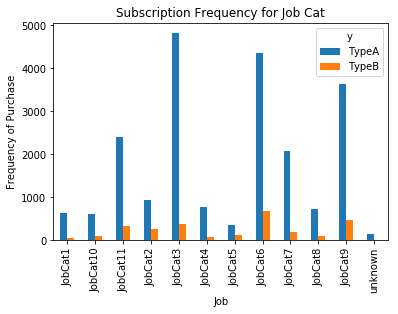

In [12]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Subscription Frequency for Job Cat')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_frequency_job')

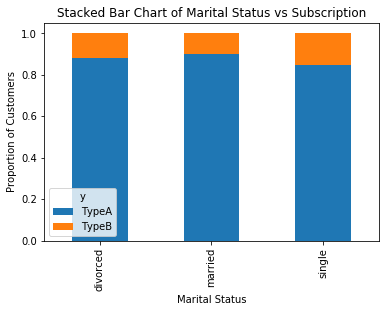

In [13]:
table=pd.crosstab(df.marital, df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_subs_stack')

### Preparing and cleaning the data

In [14]:
#Identifying outliers
df['pdays'].value_counts() 

-1      19758
 182       84
 92        78
 91        72
 183       71
 181       62
 370       60
 184       50
 350       44
 94        43
 175       42
 93        39
 185       39
 343       39
 97        38
 188       37
 174       35
 364       35
 96        33
 186       32
 189       32
 90        32
 170       31
 195       30
 176       30
 178       30
 363       30
 196       29
 179       29
 356       29
        ...  
 436        1
 404        1
 20         1
 4          1
 547        1
 531        1
 403        1
 503        1
 551        1
 26         1
 25         1
 761        1
 745        1
 633        1
 585        1
 553        1
 489        1
 425        1
 409        1
 792        1
 775        1
 776        1
 760        1
 504        1
 472        1
 424        1
 376        1
 495        1
 791        1
 32         1
Name: pdays, Length: 478, dtype: int64

In [15]:
#Identifying outliers
df['default'].value_counts()

no     23871
yes      447
Name: default, dtype: int64

In [16]:
#Identifying outliers
df['duration'].value_counts()

0    24318
Name: duration, dtype: int64

In [17]:
#Removing instances that have -1 as a value of pdays considering -1 shows that the call has not been made yet
df = df[df.pdays != -1]

# #Amount of 'no' values from default(5) is relatively larger than 'yes', thus column default is dropped
# #Duration(12) is dropped since it only has one unique value which are all = 0
df.drop(df.columns[[0, 5, 12]], axis=1, inplace=True) #dropping columns id(0), default(5) and duration(12)

df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
12989,31,JobCat11,married,tertiary,882,no,no,telephone,21,oct,1,151,3,failure,TypeA
12995,34,JobCat6,married,tertiary,2415,yes,no,telephone,22,oct,1,86,4,other,TypeA
12998,56,JobCat9,married,secondary,589,yes,no,unknown,23,oct,1,147,2,success,TypeB
13017,51,JobCat11,single,secondary,3132,no,no,telephone,5,nov,1,176,1,failure,TypeA
13033,31,JobCat10,divorced,secondary,1005,yes,no,telephone,10,nov,1,174,2,failure,TypeA


In [18]:
#The size of the rows and columns are now changed after dropping two and removing instances
df.shape

(4560, 15)

In [19]:
#Label Encoding 
le = preprocessing.LabelEncoder()

df = df.apply(le.fit_transform)
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
12989,15,2,1,2,971,0,0,1,20,10,0,136,2,0,0
12995,18,7,1,2,1628,1,0,1,21,10,0,71,3,1,0
12998,38,10,1,1,763,1,0,2,22,10,0,132,1,2,1
13017,33,2,2,1,1800,0,0,1,4,9,0,161,0,0,0
13033,15,1,0,1,1050,1,0,1,9,9,0,159,1,0,0


In [20]:
# Upsampling the whole values of initial dataset
append_samples = utils.resample(df, replace=True, n_samples=1500, random_state=100)

df = pd.concat([df, append_samples])

df.shape

(6060, 15)

In [21]:
#Display the number of people who have purchased the term deposit(Type A)
# and the number of people who did not (Type B)
df['y'].value_counts()

0    4619
1    1441
Name: y, dtype: int64

In [22]:
X = df.iloc[:, 0:-1]
X[0:10]

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
12989,15,2,1,2,971,0,0,1,20,10,0,136,2,0
12995,18,7,1,2,1628,1,0,1,21,10,0,71,3,1
12998,38,10,1,1,763,1,0,2,22,10,0,132,1,2
13017,33,2,2,1,1800,0,0,1,4,9,0,161,0,0
13033,15,1,0,1,1050,1,0,1,9,9,0,159,1,0
13039,16,2,1,2,983,1,0,2,11,9,0,155,2,0
13044,26,5,1,2,1379,1,0,0,16,9,0,180,1,0
13045,26,7,1,2,2116,1,1,0,16,9,0,173,0,0
13050,16,10,2,1,326,1,0,0,16,9,0,181,1,0
13053,31,7,1,2,1336,0,0,0,16,9,0,157,0,0


In [23]:
y = df.iloc[:, -1]
y[0:10]

12989    0
12995    0
12998    1
13017    0
13033    0
13039    1
13044    0
13045    0
13050    0
13053    0
Name: y, dtype: int64

In [24]:
#Splitting the dataset
RANDOM_STATE = 0
X_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.20, 
                                                                    random_state=RANDOM_STATE)  #80/20 split

In [25]:
X_train.shape, y_train.shape

((4848, 14), (4848,))

In [26]:
x_test.shape, y_test.shape

((1212, 14), (1212,))

In [27]:
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(y_test.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

[0 1 0 ... 0 0 0]
binary
binary
binary


### Scaler applied in Training and Testing Sets

In [28]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features on training set only
scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
x_test = scaler.transform(x_test)

### Importing the queries dataset

In [29]:
#read and add the columns
q_df = pd.read_csv('data/queries.txt', delimiter=',', header=None, names=featureNames)
q_df = q_df.apply(le.fit_transform)
q_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,39,7,1,2,0,1219,1,0,2,4,8,0,0,0,0,3,0
1,1111,13,4,2,0,0,217,1,1,2,4,8,0,0,0,0,3,0
2,1926,34,10,1,1,0,191,0,0,2,4,8,0,0,0,0,3,0
3,2037,19,7,2,2,0,564,1,0,2,4,8,0,0,0,0,3,0
4,2148,34,10,1,1,0,536,1,0,2,4,8,0,0,0,0,3,0


In [30]:
#Mirroring the shape of the initial df
q_df = q_df[q_df.pdays != -1]
q_df.drop(q_df.columns[[0, 5, 12]], axis=1, inplace=True) 

q_df

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,39,7,1,2,1219,1,0,2,4,8,0,0,0,3,0
1,13,4,2,0,217,1,1,2,4,8,0,0,0,3,0
2,34,10,1,1,191,0,0,2,4,8,0,0,0,3,0
3,19,7,2,2,564,1,0,2,4,8,0,0,0,3,0
4,34,10,1,1,536,1,0,2,4,8,0,0,0,3,0
5,11,10,1,1,340,1,1,2,4,8,1,0,0,3,0
6,27,10,0,1,271,0,0,2,4,8,0,0,0,3,0
7,19,10,2,1,1116,1,0,2,4,8,0,0,0,3,0
8,35,4,1,0,507,1,0,2,4,8,1,0,0,3,0
9,7,2,2,1,274,1,0,2,4,8,0,0,0,3,0


In [31]:
predQueries = q_df.iloc[:, 0:-1]
predQueries[0:10]

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,39,7,1,2,1219,1,0,2,4,8,0,0,0,3
1,13,4,2,0,217,1,1,2,4,8,0,0,0,3
2,34,10,1,1,191,0,0,2,4,8,0,0,0,3
3,19,7,2,2,564,1,0,2,4,8,0,0,0,3
4,34,10,1,1,536,1,0,2,4,8,0,0,0,3
5,11,10,1,1,340,1,1,2,4,8,1,0,0,3
6,27,10,0,1,271,0,0,2,4,8,0,0,0,3
7,19,10,2,1,1116,1,0,2,4,8,0,0,0,3
8,35,4,1,0,507,1,0,2,4,8,1,0,0,3
9,7,2,2,1,274,1,0,2,4,8,0,0,0,3


### Discerning for the most suitable classifier

In [32]:
#Classification Algorithms 
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report

In [34]:
#All classifiers that were covered in class in one list 
classifiers = [
                DecisionTreeClassifier(),
                lm.LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000),
                KNeighborsClassifier(n_neighbors=3),
                GaussianNB(),
                svm.SVC()
    ]

#Iterate each of the classifiers' fit and predictions from the list 
#And display their ROC_AUC, classification accuracy, confusion matrix and classification report
for clf in classifiers:
    print(clf)
    
    clf.fit(X_train, y_train_encoded)
    y_pred = clf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    print("ROC_AUC: ",roc_auc.round(4))
    print("Accuracy: ", accuracy_score(y_test, y_pred).round(4))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test,y_pred), '\n')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


ValueError: Found input variables with inconsistent numbers of samples: [1212, 4848]

In [ ]:
#Predict the target feature of queries with various classifiers
for clf_pred in classifiers:
    y_predQ_spec = clf_pred.predict(predQueries)
    print(clf_pred)
    
    #Display the amount of Type A(0) and Type B(1) according to their respective classifier
    unique, counts = np.unique(y_predQ_spec, return_counts=True)
    print(dict(zip(unique, counts)), "\n")

### The model chosen: 

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train_encoded)

In [ ]:
y_predQ = model.predict(predQueries)

In [ ]:
y_predQ

In [ ]:
print(model)
for typeOfItem in y_predQ:
    if typeOfItem == 0:
        print("".join(str("\"TypeA\"")))
    else:
        print("".join(str("        \"TypeB\"")))        

In [ ]:
predQ_array = np.asarray(["\"TypeA\"" if  a == 0 else "\"TypeB\"" for a in y_predQ])

In [ ]:
unique, counts = np.unique(predQ_array, return_counts=True)
pred_value_count = dict(zip(unique, counts))
pred_value_count

In [ ]:
myfile = open('CA2_predict.txt', 'w')

count = 0
for i, instance in enumerate(predQ_array):
        count += 1
        myfile.writelines("TEST" + str(count) + "," + str(instance) + '\n')



myfile.close()